In [1]:
!pip install scikit-learn pandas matplotlib seaborn joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)
print("Class Distribution:\n", y.value_counts())


Dataset Shape: (569, 30)
Class Distribution:
 1    357
0    212
Name: count, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [7]:
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=500))
    ]),

    "Decision Tree": Pipeline([
        ("model", DecisionTreeClassifier())
    ]),

    "Random Forest": Pipeline([
        ("model", RandomForestClassifier())
    ]),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC())
    ])
}


In [9]:
results = []

for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([
        name, train_score, test_score,
        accuracy, precision, recall, f1
    ])

columns = ["Model", "Train Score", "Test Score",
           "Accuracy", "Precision", "Recall", "F1"]

comparison_df = pd.DataFrame(results, columns=columns)
comparison_df


,Model,Train Score,Test Score,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.989011,0.982456,0.982456,0.986111,0.986111,0.986111
1,Decision Tree,1.000000,0.912281,0.912281,0.955882,0.902778,0.928571
2,Random Forest,1.000000,0.956140,0.956140,0.958904,0.972222,0.965517
3,SVM,0.982418,0.982456,0.982456,0.986111,0.986111,0.986111


In [11]:
comparison_df.to_csv("model_comparison.csv", index=False)


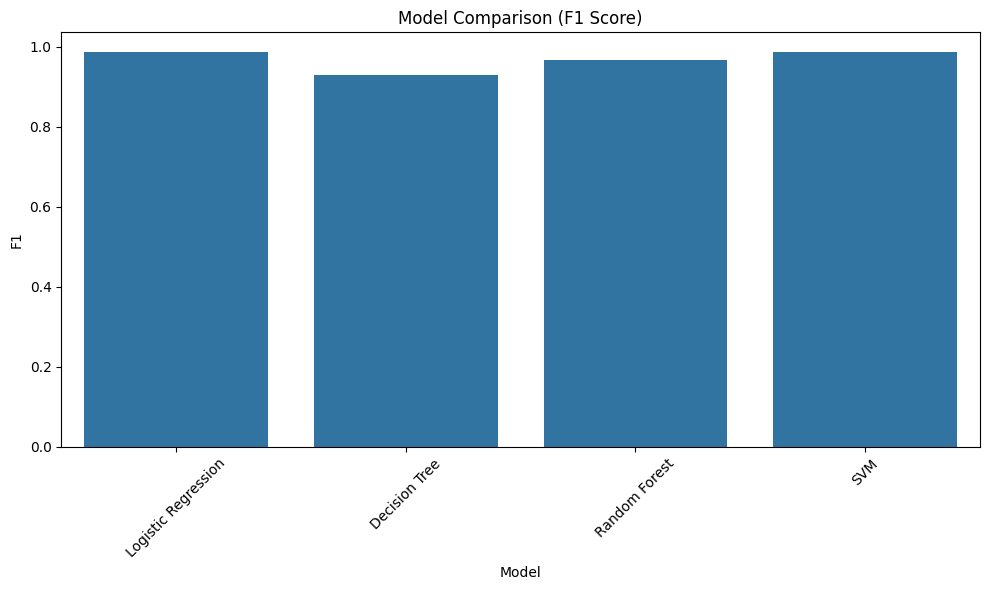

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="F1", data=comparison_df)
plt.xticks(rotation=45)
plt.title("Model Comparison (F1 Score)")
plt.tight_layout()
plt.savefig("comparison_plot.png")
plt.show()


In [15]:
comparison_df["Overfitting Gap"] = comparison_df["Train Score"] - comparison_df["Test Score"]
comparison_df


,Model,Train Score,Test Score,Accuracy,Precision,Recall,F1,Overfitting Gap
0,Logistic Regression,0.989011,0.982456,0.982456,0.986111,0.986111,0.986111,0.006555
1,Decision Tree,1.000000,0.912281,0.912281,0.955882,0.902778,0.928571,0.087719
2,Random Forest,1.000000,0.956140,0.956140,0.958904,0.972222,0.965517,0.043860
3,SVM,0.982418,0.982456,0.982456,0.986111,0.986111,0.986111,-0.000039


In [17]:
best_model_name = comparison_df.sort_values("F1", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

joblib.dump(best_model, "best_model.pkl")

print("Best Model Selected:", best_model_name)


Best Model Selected: Logistic Regression


In [18]:
with open("report.txt", "w") as f:
    f.write("MODEL COMPARISON REPORT\n")
    f.write("=======================\n\n")
    f.write(comparison_df.to_string())
    f.write(f"\n\nBest Model: {best_model_name}")
